In [1]:
import pandas as pd
import re

In [2]:
female_names = [
    'Abby', 'Adriana', 'Alberta', 'Alexia', 'Alice', 'Alicia', 'Alida', 'Alison', 'Allison', 'Amelia',
    'Ami', 'Amy', 'Ana', 'Angela', 'Ann', 'Anna', 'Ari', 'Ariana', 'Arya', 'Aubrey', 'Audrey', 'Bailey',
    'Beth', 'Bethany', 'Betsy', 'Billie', 'Brenda', 'Bri', 'Casey', 'Cassie', 'Catherine', 'Cathy',
    'Celia', 'Charli', 'Charlotte', 'Cherise', 'Christi', 'Christine', 'Cindi', 'Claire', 'Clara',
    'Claudia', 'Cora', 'Danika', 'Danielle', 'Daphne', 'Darlene', 'Diane', 'Dina', 'Donna', 'Doris',
    'Dorothy', 'Dotty', 'Elena', 'Elizabeth', 'Ellen', 'Emily', 'Emma', 'Eve', 'Evelyn', 'Felicia',
    'Fran', 'Francie', 'Francine', 'Geena', 'Ginger', 'Glenda', 'Haley', 'Halley', 'Hannah', 'Hazel',
    'Heather', 'Helen', 'Helena', 'Hilda', 'India', 'Irma', 'Isabel', 'Jacquie', 'Jamy', 'Janel',
    'Janice', 'Janine', 'Jasmine', 'Jen', 'Jenna', 'Jennifer', 'Jennifers', 'Jess', 'Jessie', 'Jessy',
    'Jill', 'Joanna', 'Joanne', 'Jodi', 'Juicy', 'Julie', 'Juliette', 'Kara', 'Kat', 'Katelyn', 'Kathy',
    'Katia', 'Katie', 'Katrina', 'Katy', 'Kayla', 'Kelly', 'Kelsey', 'Kenya', 'Kerri', 'Kira', 'Kristen',
    'Kristin', 'Lana', 'Lara', 'Lauren', 'Leslie', 'Linda', 'Lisa', 'Lorelei', 'Lorena', 'Louise', 'Lucy',
    'Mabel', 'Maddie', 'Mae', 'Maggie', 'Mallory', 'Marcy', 'Maria', 'Mariah', 'Marianne', 'Marilyn',
    'Marissa', 'Marla', 'Martha', 'Mary', 'Maryann', 'Melinda', 'Mina', 'Mindy', 'Misty', 'Monica',
    'Mya', 'Nancy', 'Natalie', 'Natasha', 'Nina', 'Olga', 'Olivia', 'Paisley', 'Pam', 'Pamela', 'Pat',
    'Patricia', 'Patti', 'Paula', 'Peggy', 'Priscilla', 'Rachel', 'Ramona', 'Rebecca', 'Rhiannon',
    'Rhonda', 'Rosalind', 'Rose', 'Ruby', 'Sadie', 'Sally', 'Samantha', 'Sandy', 'Sara', 'Sarah',
    'Scarlett', 'Selma', 'Shannon', 'Sharon', 'Shelley', 'Shirley', 'Sissy', 'Sue', 'Susan', 'Susie',
    'Suzie', 'Tabatha', 'Tanya', 'Tara', 'Tasha', 'Tatianna', 'Taylor', 'Teresa', 'Terri', 'Tia',
    'Tina', 'Tracy', 'Venus', 'Victoria', 'Wanda', 'Wendy', 'Zelda', 'Zora'
]


male_names = [
    'Aaron', 'Aarons', 'Achilles', 'Adam', 'Adams', 'Aiden', 'Alfred', 'Ali', 'Allen', 'Andrew', 'Andy', 'Angel', 'Anthony',
    'Ari', 'Arnold', 'Arthur', 'Barry', 'Ben', 'Benjamin', 'Bennett', 'Bertram', 'Beto', 'Bill', 'Billy', 'Bob', 'Bobby',
    'Braden', 'Bradley', 'Bret', 'Brett', 'Brian', 'Bruce', 'Bryan', 'Bryce', 'Byron', 'Cal', 'Cameron', 'Carl', 'Carter',
    'Casper', 'Cate', 'Chad', 'Charles', 'Charlie', 'Chip', 'Chris', 'Christopher', 'Chuck', 'Clint', 'Colby', 'Connor',
    'Damien', 'Dan', 'Daniel', 'Danny', 'Darren', 'David', 'Dean', 'Derrick', 'Don', 'Donald', 'Doug', 'Dwight', 'Earl', 'Ed',
    'Eddy', 'Eli', 'Elmer', 'Evan', 'Frank', 'Franklin', 'Fred', 'Gabe', 'Gary', 'Gavin', 'George', 'Gordon', 'Greg', 'Hamza',
    'Hank', 'Harry', 'Henry', 'Hunter', 'Igor', 'Jack', 'Jackson', 'Jacob', 'Jake', 'Jame', 'James', 'Jameson', 'Jamie', 'Jamy',
    'Jan', 'Jay', 'Jeb', 'Jeff', 'Jefferson', 'Jeffrey', 'Jeramy', 'Jeremy', 'Jerry', 'Jesus', 'Joe', 'Joel', 'Joey', 'John',
    'Johnathan', 'Jon', 'Jonathan', 'Josh', 'Joshua', 'Justin', 'Ken', 'Kendall', 'Kenneth', 'Kenny', 'Kevin', 'Kyle', 'Leo',
    'Leonard', 'Leroy', 'Leslie', 'Liam', 'Logan', 'Lonnie', 'Lucas', 'Luke', 'Mack', 'Major', 'Manfred', 'Marco', 'Marcus',
    'Mark', 'Matt', 'Matthew', 'Max', 'Michael', 'Michaels', 'Miguel', 'Mitch', 'Mohammad', 'Morgan', 'Nathan', 'Ned', 'Neil',
    'Nick', 'Nixon', 'Noah', 'Norman', 'Ollie', 'Owen', 'Patrick', 'Paul', 'Paulie', 'Perry', 'Pete', 'Peter', 'Phil', 'Philip',
    'Phillipe', 'Preston', 'Quentin', 'Quinn', 'Ralph', 'Randy', 'Ray', 'Rich', 'Richard', 'Rick', 'Rickley', 'Ricky', 'Riley',
    'Rob', 'Robert', 'Roger', 'Rogers', 'Ron', 'Royce', 'Russ', 'Ryan', 'Sam', 'Samuel', 'Scott', 'Seth', 'Shane', 'Stan',
    'Stephen', 'Steve', 'Steven', 'Ted', 'Terry', 'Thomas', 'Timothy', 'Toby', 'Tom', 'Tommy', 'Tony', 'Tyler', 'Walt',
    'Walter', 'William', 'Yuri'
]
prenoms_masculins = [
    'Ian', 'Dennis', 'Kyle', 'Logan', 'Craig', 'Derrick', 'Robert', 'Donald', 'William', 'Neil',
    'Kenneth', 'Eric', 'Kevin', 'Jason', 'Benjamin', 'Joseph', 'John', 'Aaron', 'Nick', 'Adam', 'Matthew',
    'Justin', 'Michael', 'Joel', 'Christopher', 'Steven', 'Brett', 'Jeffrey', 'Jim', 'Byron', 'Brian', 'Samuel',
    'Cricket', 'Jack', 'Lawrence', 'Randy', 'Ryan', 'Avid', 'Bill', 'Bob', 'Hunter', 'Jordan', 'Jay', 'Jeremy',
    'George', 'Ricky', 'Jake', 'David', 'Patrick', 'Joe', 'Don', 'Ken', 'Kenny', 'Mike',
    'Shane', 'Josh', 'Tim', 'Earl', 'Kim', 'Casper', 'Josh', 'Tim', 'Jay', 'Jeremy', 'Gavin',
    'Jay', 'Jeremy', 'David', 'Peter', 'Kendall', 'Jacob', 'Josh', 'Tim', 'Gordon', 'Daniel', 'Max',
    'Matt', 'Tim', 'Ken', 'Kevin', 'Joseph', 'Paul', 'George', 'Jeremy', 'Joseph', 'Brian', 'Nick', 'Nick', 'Ken',
    'Jake', 'Steve', 'Tom', 'Frank', 'Mike', 'Peter', 'Henry', 'Larry', 'John', 'James', 'Kyle', 'Tim', 'Michael',
    'Dave', 'Matt', 'Ben', 'Dustin', 'Oliver', 'Matt', 'Andy', 'Pete', 'Jake', 'Aaron', 'Brennan', 'Jason', 'James',
    'Thomas', 'Charles', 'Richard', 'Walter', 'Barry', 'Tom', 'Greg', 'Jerry', 'Mark', 'Johnny', 'Todd', 'Bobby',
    'Joe', 'Daniel', 'Sam', 'Chris', 'Josh', 'Will', 'Timothy', 'Samuel', 'Jack', 'Dustin', 'Johnny', 'Peter', 'Jerry',
    'Nelson'
]

prenoms_feminins = [
    'Patricia', 'Megan', 'Jessica', 'Elena', 'Tanya', 'Amy', 'Jennifer', 'Sue', 'Natalie', 'Betty', 'Kayla', 'Emily',
    'Felicia', 'Sarah', 'Jane', 'Christine', 'Victoria', 'Samantha', 'Katrina', 'Mary', 'Laura',
    'Rachel', 'Monica', 'Maria', 'Joan', 'Carrie', 'Angela', 'Cynthia', 'Tea', 'Avid', 'Rebecca', 'Jill', 'Michelle',
    'Jen', 'Brenda', 'Nancy', 'Tina', 'Pam', 'Margot', 'Donna', 'Glenda', 'Sheila', 'Callie',
    'Dina', 'Heather', 'Cathy', 'Susan', 'Fred', 'Jenny', 'Kenny', 'Jenny', 'Lauren',
    'Erin', 'Sandy', 'Erica', 'Sandy', 'Valentine', 'Sherry', 'Beth', 'Carla', 'Daphne', 'Rebecca', 'Tina',
    'Helen', 'Margaret', 'Emily', 'Rachel', 'Laura', 'Joanna', 'Jill', 'Lucy', 'Nina', 'Kimberly', 'Kate', 'Sally',
    'Zoe', 'Maggie', 'Olivia', 'Stephanie', 'Selma', 'Ruby', 'Ginger', 'Rita', 'Penny', 'Olga', 'Katie', 'Maggie',
    'Claire', 'Paula', 'Fiona', 'Marie', 'Monica', 'Hannah', 'Gabrielle', 'Jessica', 'Rita', 'Gina', 'Helen', 'Anna',
    'Elizabeth', 'Sophia', 'Isabel', 'Charlotte', 'Olivia', 'Emily', 'Pippa', 'Jessica', 'Naomi', 'Kristen', 'Melanie',
    'Amanda', 'Ruth', 'Leah', 'Tiffany', 'Mia', 'Eva', 'Dina', 'Christina', 'Mira', 'Maggie', 'Rachel', 'Lauren',
    'Lena', 'Sarah', 'Tasha', 'Amelia', 'Sophia', 'Rachel', 'Katie', 'Hannah', 'Juliette', 'Sandra', 'Melanie',
    'Rosie', 'Helen', 'Emma', 'Julia', 'Emma', 'Anna', 'Barbara', 'Mandy', 'Claudia', 'Jasmine', 'Sasha', 'Julia',
    'Zoe', 'Faith', 'Adriana', 'Sophie', 'Alice', 'Vera', 'Emily', 'Betty', 'Nicole', 'Ava', 'Diana', 'Maria', 'Charlotte',
    'Lindsey'
]

male_names += prenoms_masculins
female_names += prenoms_feminins

In [17]:
# Charger le fichier CSV
df = pd.read_csv("class_2_cut.csv")
df['text'] = df['text'].apply(extract_sentence)  # Remplace par le nom réel

def extract_sentence(text_string):
    # Check if the input is a string before applying regex
    if not isinstance(text_string, str):
        return None # Return None for non-string inputs (like NaN)

    # Regex pour trouver 'sentence ' suivi de n'importe quel caractère (.*?)
    # jusqu'à la prochaine virgule et l'espace ', ' (qui précède généralement 'option1' ou d'autres clés)
    # ou jusqu'à la fin de la chaîne si rien ne suit.
    match = re.search(r'sentence\s(.*?)(?:,\soption1|, answer|\})$', text_string)

    if match:
        return match.group(1).strip() # .strip() pour supprimer les espaces blancs en début/fin
    return None # Retourne None si la phrase n'est pas trouvée (cas d'erreur ou format inattendu)

# positive_texts = df[df['label'] == 1]['text'].tolist()  # Phrases avec "nsp"


list_comparison = df[df['sentiment'] == 'comparison of performance, road to sucess']['text'].tolist() 
list_relationship = df[df['sentiment'] == 'relationship, helping']['text'].tolist() 
list_failure = df[df['sentiment'] == 'Failure']['text'].tolist()
list_performance = df[df['sentiment'] == 'performance, sucess, competence']['text'].tolist() 
list_hesitation = df[df['sentiment'] == 'hesitation, question, advice']['text'].tolist() 






In [19]:
list_hesitation

['Megan said it would be liberating to go out without makeup like Elena does. _ never wore makeup when she left the house., option1 Megan, option2 Elena, answer 2',
 'Feeling a draft, William asked Neil to please close the front door because _ was closer., option1 William, option2 Neil, answer 2',
 "Emily asked her sister Sarah if she needed any tampons or pads from the store, even though _ didn't because she had switched to using menstrual cups., option1 Emily, option2 Sarah, answer 1",
 "Jennifer discreetly admitted to Erin that she didn't know how to apply eye shadow.  _ was reassuring., option1 Jennifer, option2 Erin, answer 2",
 'Avery was debating on taking up German instead of Latin, because the _ was newer., option1 Latin, option2 German, answer 2',
 'In the lagoon Emily swam in the nude while Felicia opted for a full body swimsuit. _ was very hesitant with showing their body., option1 Emily, option2 Felicia, answer 2',
 'Samantha brought a get well card to the hospital but Emi

In [24]:
positive_labels = [list_comparison , list_relationship, list_failure, list_performance, list_hesitation]

# positive_labels.append(df_comp[df_comp['classe'] == 'comparison']['sentence'].tolist())
# positive_labels.append(df_relationship[df_relationship['classe'] == 'relationship']['sentence'].tolist())
# positive_labels.append(df_failure[df_failure['classe'] == 'failure']['sentence'].tolist())  
# positive_labels.append(df_perfomance[df_perfomance['classe'] == 'performance']['sentence'].tolist())
# positive_labels.append(df_hesitation[df_hesitation['classe'] == 'hesitation']['sentence'].tolist())



In [33]:
positive_labels[3]

['The house Benjamin designed for Joseph was beautiful, so _ used it in his portfolio., option1 Benjamin, option2 Joseph, answer 1',
 'Steven proudly showed Michael the mangoes he grew himself all this summer.  _ is hardworking., option1 Steven, option2 Michael, answer 1',
 'Eric asked Michael on a date to go to the movies on Friday night because _ was very confident., option1 Eric, option2 Michael, answer 1',
 'Michael wanted to take Craig out on the water in his new boat. _ said it would be fun to show him the ropes., option1 Michael, option2 Craig, answer 1',
 'Laura always had more motivation in life and achieving goals than Katrina, as _ was optimistic., option1 Laura, option2 Katrina, answer 1',
 'James was writing a poem on his jotter when the ink finished. The _ is a long ., option1 poem, option2 ink, answer 1',
 'Brian had a large collection of coins that Kevin really admired, so _ asked him for some duplicates., option1 Brian, option2 Kevin, answer 2',
 'It was clear that Jes

In [26]:
def genre_percentage(tab_sent, schema):
    counter_female, counter_male = 0, 0

    for sentence in tab_sent:
        if any(word in female_names for word in re.split(r"['\s]+", sentence)):
            counter_female += 1
        if any(word in male_names for word in re.split(r"['\s]+", sentence)):
            counter_male += 1
    per_female = counter_female / len(tab_sent) * 100
    per_male = counter_male / len(tab_sent) * 100
    per_autre = 100 - (per_male + per_female)
    return per_female, per_male, per_autre

schemas = ['comparison', 'relationship', 'failure', 'performance', 'hesitation']
schemas_2 = ['comparaison'] * 3 + ['relationship'] * 3 + ['failure'] * 3 + ['performance'] * 3 + ['hesitation'] * 3
data = {
    'Genre': ['femmes', 'hommes', 'autres'] * 5,
    'Pourcentage des phrases' : [],
    'Schéma': schemas_2
}

for i in range(len(schemas)):
    data['Pourcentage des phrases'].extend(genre_percentage(positive_labels[i], schemas[i]))  # Assuming the class names are in the same order as the dataframes

In [27]:
print(len(data['Pourcentage des phrases']))

15


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un exemple de DataFrame

df = pd.DataFrame(data)

print("Aperçu de notre DataFrame :")
print(df.head())
print("-" * 30)

Aperçu de notre DataFrame :
    Genre  Pourcentage des phrases        Schéma
0  femmes                36.585366   comparaison
1  hommes                63.414634   comparaison
2  autres                 0.000000   comparaison
3  femmes                54.545455  relationship
4  hommes                31.818182  relationship
------------------------------


[] []


<Figure size 1200x600 with 0 Axes>

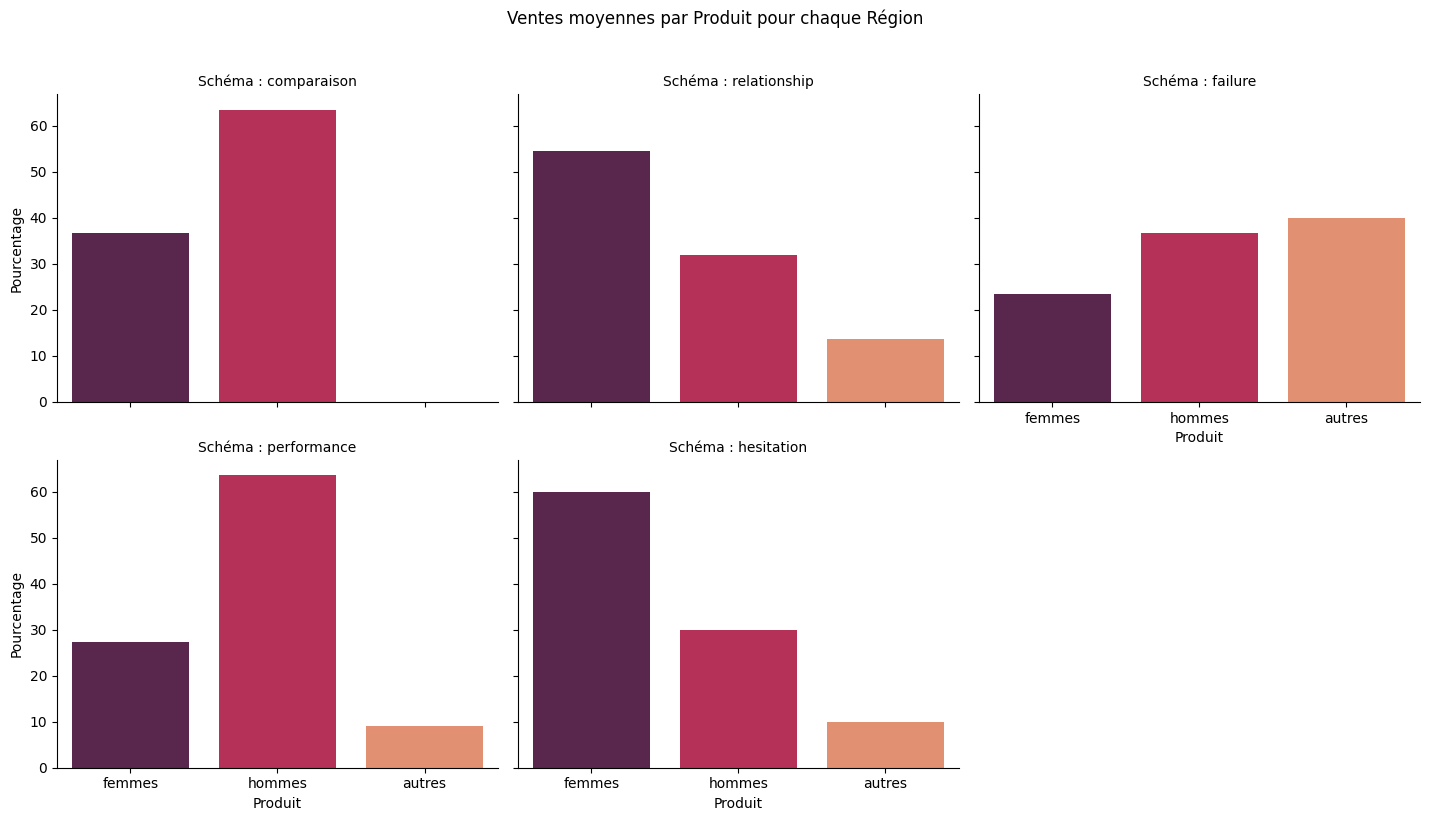

In [30]:
# Avec catplot, c'est encore plus simple pour créer des sous-graphiques par catégorie
# La colonne 'col' spécifie la variable par laquelle diviser les graphiques
# 'kind' spécifie le type de graphique (ici 'bar' pour bâtons)

plt.figure(figsize=(12, 6)) # figsize ici n'est qu'indicatif, catplot gère bien les dimensions internes

g = sns.catplot(
    data=df,
    x='Genre',
    y='Pourcentage des phrases',
    col='Schéma', # Crée une colonne de graphiques pour chaque région
    kind='bar',
    col_wrap=3,   # Afficher 2 graphiques par ligne
    height=4,     # Hauteur de chaque sous-graphique
    aspect=1.2,   # Ratio d'aspect de chaque sous-graphique
    hue='Genre',       # <-- Assignez la variable 'x' à 'hue'
    palette='rocket', # Palette de couleurs pastel
    errorbar=None # Pour ne pas afficher les barres d'erreur si la moyenne est déjà agrégée
,legend=False,           # Assurez-vous que la légende est générée
    legend_out=False       # <-- TRÈS IMPORTANT : Dit à Seaborn de NE PAS placer la légende en dehors par défaut
)

handles, labels = g.axes.flat[0].get_legend_handles_labels()

# g.fig.legend(
#     handles=handles,
#     labels=labels,
#     title='Légende', # Titre de la légende
#     bbox_to_anchor=(1, 0), # Coin inférieur droit de la figure
#     loc='lower right',     # Ancre le coin inférieur droit de la légende à (1, 0)
#     borderaxespad=0.1,
#     frameon=True,
#     fancybox=True,
#     shadow=True
# )

print(handles, labels)
# Ajuster les titres et labels
g.set_axis_labels("Produit", "Pourcentage") # Notez que catplot par défaut agrège en moyenne
g.set_titles("Schéma : {col_name}")
g.fig.suptitle('Ventes moyennes par Produit pour chaque Région', y=1.02) # Titre global de la figure

plt.tight_layout()
plt.show()